# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

In [3]:
cities

['aykhal',
 'paragominas',
 'edinburgh of the seven seas',
 'lihue',
 'vilhena',
 'winnemucca',
 'stanley',
 'baruun-urt',
 'sola',
 'betare oya',
 'hawaiian paradise park',
 'manokwari',
 'puerto ayora',
 'ishinomaki',
 'port-aux-francais',
 'sal rei',
 'albany',
 'constantia',
 "ertil'",
 'remire-montjoly',
 'tiksi',
 'luderitz',
 'bredasdorp',
 'stolin',
 'blackmans bay',
 'belmonte',
 'saipan',
 'dudinka',
 'margaret river',
 'hovd',
 'selfoss',
 'grytviken',
 'oranjemund',
 'salavan',
 'wau',
 'kodiak',
 "st. john's",
 'prado',
 'ilulissat',
 'porto novo',
 'iskateley',
 'primorskiy',
 'alice springs',
 'qaqortoq',
 'tazovsky',
 'ban nong wua so',
 'fortuna',
 'bilibino',
 'tiquipaya',
 'papatowai',
 'santa marta',
 'pangai',
 'ranau',
 'conduaga',
 'saint-philippe',
 'fortaleza',
 'naze',
 'invercargill',
 'cova figueira',
 'santiago de cao',
 'longyearbyen',
 'puerto natales',
 'punta arenas',
 'salaqi',
 'patnanungan',
 'larache',
 'ribeira grande',
 'anadyr',
 'ahau',
 'guerre

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
city="east london"

In [5]:
url="http://api.openweathermap.org/data/2.5/weather?"
unites = "metric"
city_url = f"{url}appid={weather_api_key}&q={city}&unites={unites}"
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=ef48a52a9cf77b0011ffd9ba1a2fd39d&q=east london&unites=metric'

In [6]:
#requests.get(city_url).json()
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 27.9116, 'lat': -33.0153},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 288.58,
  'feels_like': 287.95,
  'temp_min': 288.58,
  'temp_max': 288.58,
  'pressure': 1023,
  'humidity': 68,
  'sea_level': 1023,
  'grnd_level': 1017},
 'visibility': 10000,
 'wind': {'speed': 3.98, 'deg': 60, 'gust': 6.16},
 'clouds': {'all': 34},
 'dt': 1698005200,
 'sys': {'country': 'ZA', 'sunrise': 1697944793, 'sunset': 1697991936},
 'timezone': 7200,
 'id': 1006984,
 'name': 'East London',
 'cod': 200}

In [7]:
city_weather["dt"]

1698005200

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&unites=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aykhal
Processing Record 2 of Set 1 | paragominas
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | vilhena
Processing Record 6 of Set 1 | winnemucca
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | baruun-urt
Processing Record 9 of Set 1 | sola
Processing Record 10 of Set 1 | betare oya
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | manokwari
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | ishinomaki
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | sal rei
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | ertil'
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | luderitz

Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | waingapu
Processing Record 43 of Set 4 | balykshi
Processing Record 44 of Set 4 | boca suno
Processing Record 45 of Set 4 | port glaud
City not found. Skipping...
Processing Record 46 of Set 4 | shimoda
Processing Record 47 of Set 4 | okhotsk
Processing Record 48 of Set 4 | arrifes
Processing Record 49 of Set 4 | tangalle
Processing Record 0 of Set 5 | udachny
Processing Record 1 of Set 5 | nova sintra
Processing Record 2 of Set 5 | laguna de perlas
Processing Record 3 of Set 5 | san antonio de pale
Processing Record 4 of Set 5 | cape canaveral
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | neiafu
Processing Record 7 of Set 5 | ghadamis
Processing Record 8 of Set 5 | saint-joseph
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | vieste
Processing Record 11 of Set 5 | bouca
Processing Record 12 of Set 5 | floro
Processing Record 13 of Set 5 | kristiansund
Processing Reco

Processing Record 33 of Set 8 | sinop
Processing Record 34 of Set 8 | nova xavantina
Processing Record 35 of Set 8 | dondukovskaya
Processing Record 36 of Set 8 | kafr laha
Processing Record 37 of Set 8 | nar'yan-mar
Processing Record 38 of Set 8 | juneau
Processing Record 39 of Set 8 | margate
Processing Record 40 of Set 8 | oamaru
Processing Record 41 of Set 8 | dakhla
Processing Record 42 of Set 8 | sitka
Processing Record 43 of Set 8 | farafangana
Processing Record 44 of Set 8 | anisoc
Processing Record 45 of Set 8 | villa angela
Processing Record 46 of Set 8 | aasiaat
Processing Record 47 of Set 8 | kuta
Processing Record 48 of Set 8 | rio grande
Processing Record 49 of Set 8 | bachatskiy
Processing Record 0 of Set 9 | rozhdestveno
Processing Record 1 of Set 9 | saskatoon
Processing Record 2 of Set 9 | ambovombe
Processing Record 3 of Set 9 | morag
Processing Record 4 of Set 9 | tokmok
Processing Record 5 of Set 9 | pariaman
Processing Record 6 of Set 9 | cockburn town
Processing 

Processing Record 27 of Set 12 | orumiyeh
Processing Record 28 of Set 12 | fort bragg
Processing Record 29 of Set 12 | 'afak
City not found. Skipping...
Processing Record 30 of Set 12 | omutinskiy
Processing Record 31 of Set 12 | anna regina
Processing Record 32 of Set 12 | piti village
Processing Record 33 of Set 12 | andreyevo
Processing Record 34 of Set 12 | la'ie
Processing Record 35 of Set 12 | bumba
Processing Record 36 of Set 12 | daud khel
Processing Record 37 of Set 12 | cestos city
Processing Record 38 of Set 12 | kapit
Processing Record 39 of Set 12 | ta`u
Processing Record 40 of Set 12 | muli
Processing Record 41 of Set 12 | kachug
Processing Record 42 of Set 12 | piacabucu
Processing Record 43 of Set 12 | hagere maryam
Processing Record 44 of Set 12 | querqueville
Processing Record 45 of Set 12 | nemuro
Processing Record 46 of Set 12 | otradnaya
Processing Record 47 of Set 12 | chadron
Processing Record 48 of Set 12 | novouzensk
Processing Record 49 of Set 12 | tucuma
Proc

In [13]:
city_data_df=pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aykhal,66.0000,111.5000,267.30,96,100,3.03,RU,1698005202
1,paragominas,-2.9667,-47.4833,306.58,43,100,2.07,BR,1698004914
2,edinburgh of the seven seas,-37.0676,-12.3116,285.96,85,31,5.62,SH,1698005202
3,lihue,21.9789,-159.3672,300.92,71,75,3.60,US,1698005202
4,vilhena,-12.7406,-60.1458,310.25,19,70,1.26,BR,1698005203
...,...,...,...,...,...,...,...,...,...
596,ad dabbah,18.0500,30.9500,302.90,16,0,5.62,SD,1698005301
597,santa ana,33.7456,-117.8678,299.22,62,20,3.60,US,1698005032
598,nelson bay,-32.7167,152.1500,290.93,65,7,3.13,AU,1698005301
599,howard springs,-12.4970,131.0470,300.83,89,3,2.12,AU,1698005301


In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aykhal,66.0000,111.5000,267.30,96,100,3.03,RU,1698005202
1,paragominas,-2.9667,-47.4833,306.58,43,100,2.07,BR,1698004914
2,edinburgh of the seven seas,-37.0676,-12.3116,285.96,85,31,5.62,SH,1698005202
3,lihue,21.9789,-159.3672,300.92,71,75,3.60,US,1698005202
4,vilhena,-12.7406,-60.1458,310.25,19,70,1.26,BR,1698005203


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

## Using the professors csv to generate the same plot

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

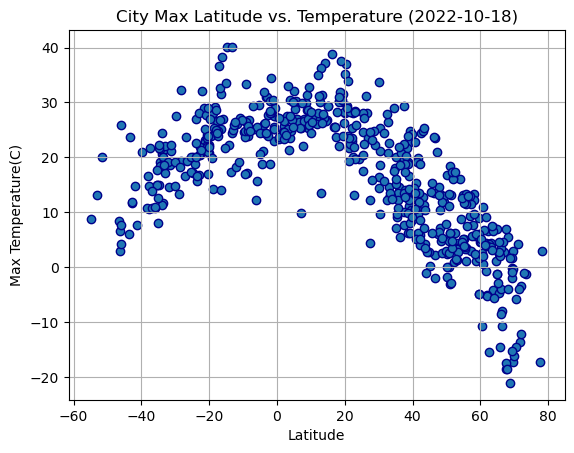

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="darkblue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

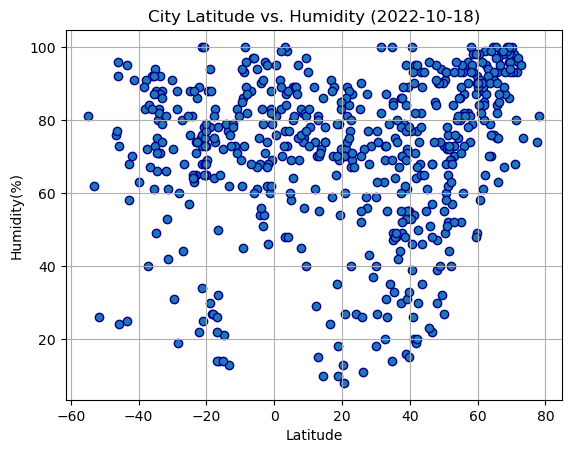

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="darkblue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

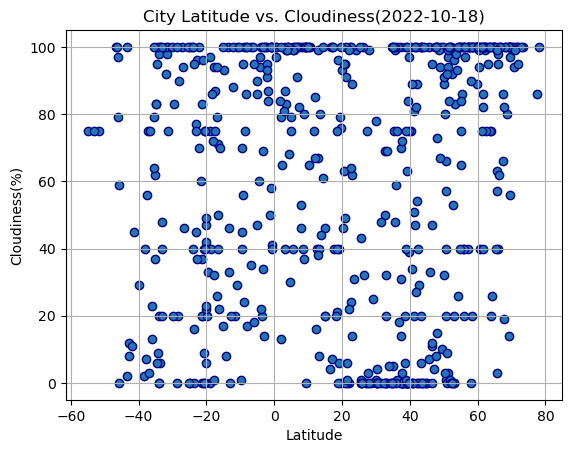

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="darkblue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

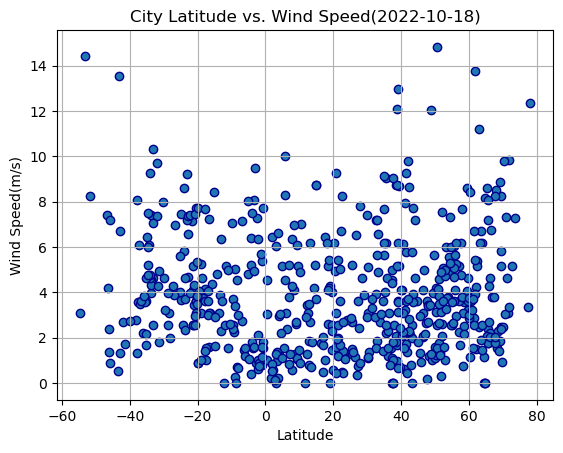

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="darkblue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


# Define a function to create Linear Regression plots

In [72]:
def linear_plt(source_x,source_y, coorx, coory, y_label):
    slope,intercept,r,p,se=linregress(source_x,source_y)
    print("The r_value is:",r)
    plt.scatter(source_x,source_y, edgecolor="darkblue")
    x=source_x
    y=slope*x+intercept
    plt.plot(x,y, color="red", linewidth = 5), 
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.text(coorx, coory,f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=11,color ="red")

The r_value is: -0.029734701768691318


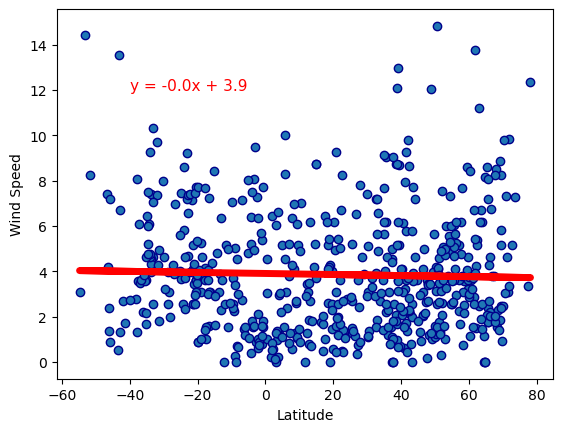

In [73]:
linear_plt(city_data_df["Lat"],city_data_df["Wind Speed"], -40, 12,"Wind Speed")

The r_value is: -0.6061548030379734


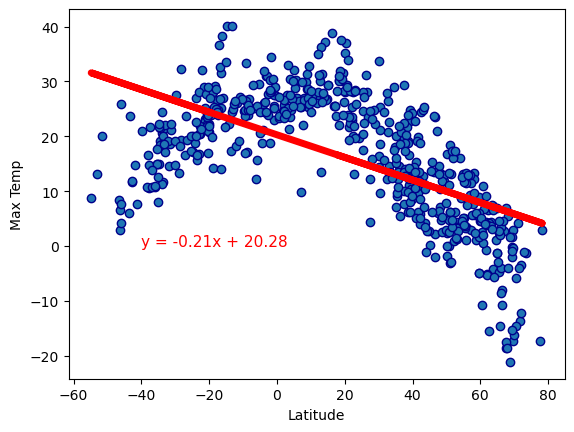

In [74]:
linear_plt(city_data_df["Lat"],city_data_df["Max Temp"], -40, 0, "Max Temp")

The r_value is: 0.12451594805025407


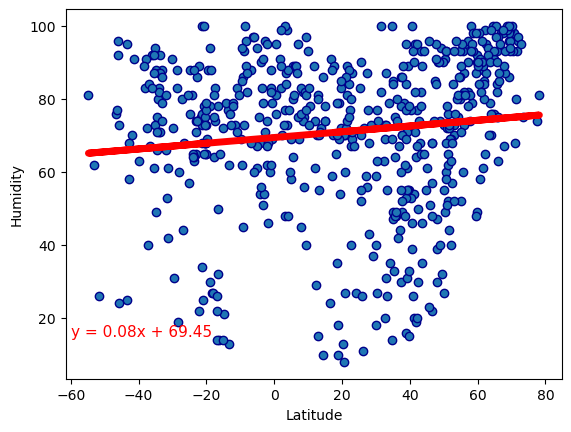

In [75]:
linear_plt(city_data_df["Lat"],city_data_df["Humidity"], -60,15,"Humidity" )

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r_value is: -0.8462548186825364


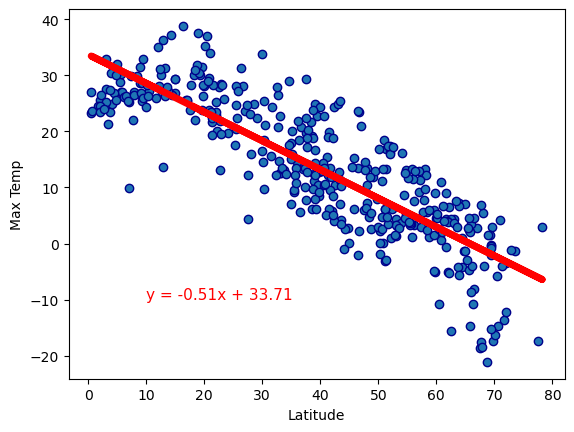

In [78]:
linear_plt(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], 10,-10, "Max Temp")

The r_value is: 0.6419546065421801


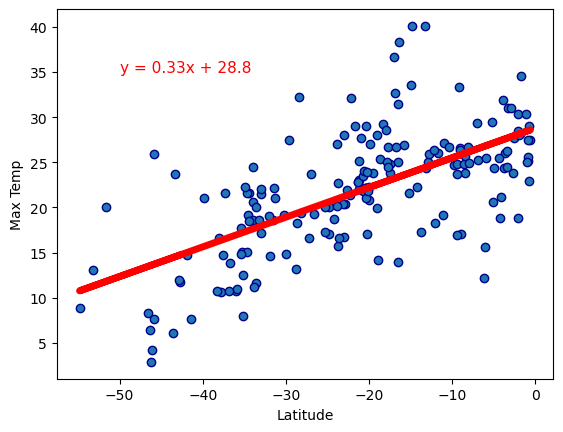

In [79]:
linear_plt(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], -50,35, "Max Temp")

### Discussion about the linear relationship: Both northern hemishpere and southern hemisphere has linear relationship between latitude and Max Temp. The northern hemishpere has stronger relationshp than the southern hemisphere.  


### Humidity vs. Latitude Linear Regression Plot

The r_value is: 0.2385317912939407


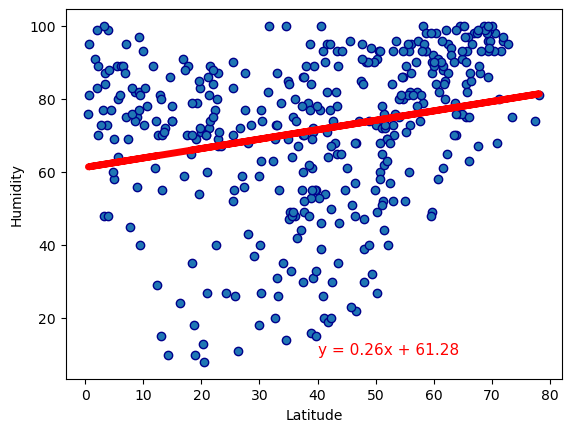

In [80]:
linear_plt(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], 40,10, "Humidity")

The r_value is: 0.016759316950056818


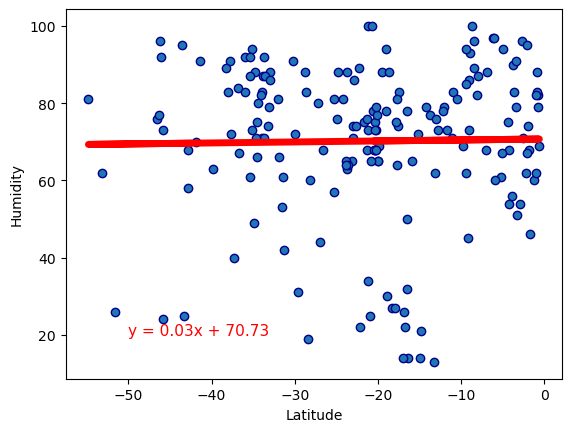

In [81]:
linear_plt(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], -50,20, "Humidity")

**Discussion about the linear relationship:**
### The northern and southern hemispheres almost have no linear relationship between latitude and humidity. These two hemispheres have a weak positive relationship. Although the variables go up in response to one another, the relationship is still not strong. Only 30% of the scatter plot dots is surrounded by the red line.

### Cloudiness vs. Latitude Linear Regression Plot

The r_value is: 0.155004893876971


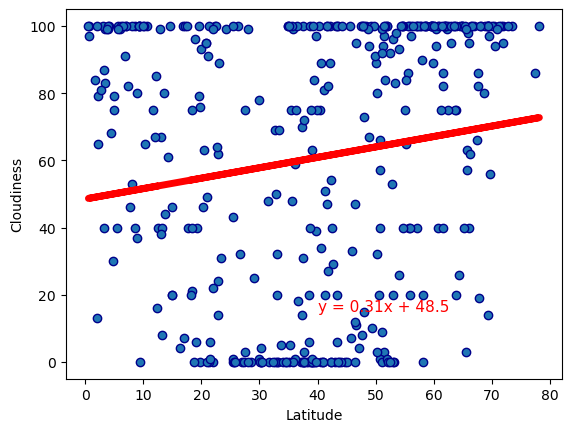

In [84]:
linear_plt(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], 40,15, "Cloudiness")

The r_value is: 0.14341322916643243


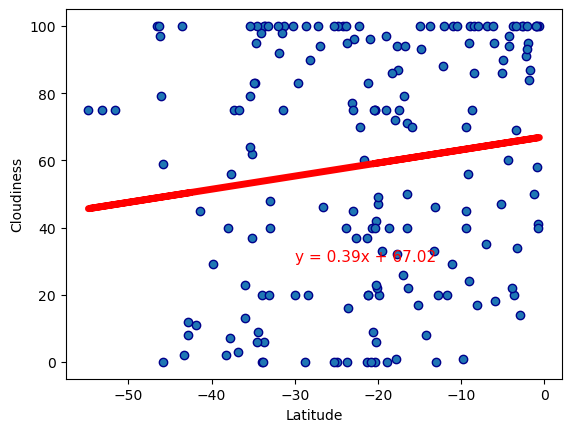

In [86]:
linear_plt(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], -30,30, "Cloudiness")

**Discussion about the linear relationship:
### Both northern hemishpere and southern hemisphere almost has no linear relationship between latitude and cloudiness. Both the southern and northern hemishpere have a low positive weak relationshp.

### Wind Speed vs. Latitude Linear Regression Plot

The r_value is: 0.17434667290903338


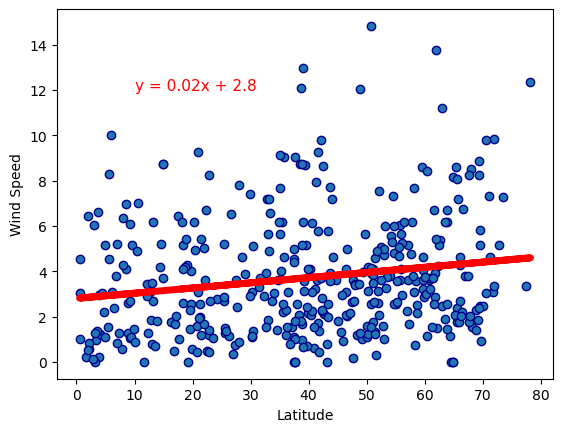

In [87]:
# Northern Hemisphere
linear_plt(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], 10,12, "Wind Speed")

The r_value is: -0.24947753546264592


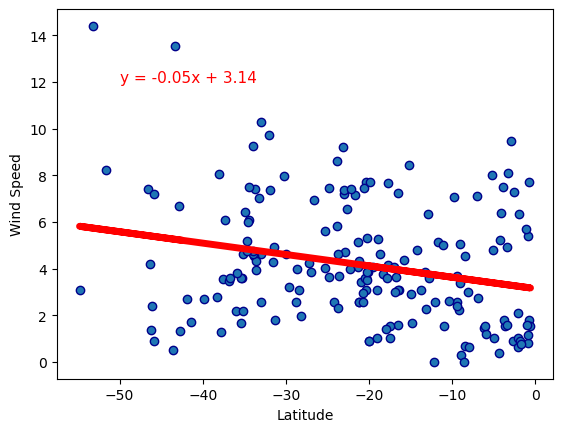

In [88]:
linear_plt(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], -50,12, "Wind Speed")

**Discussion about the linear relationship:** 
### Both northern hemishpere and southern hemisphere almost has no linear relationship between latitude and wind speed. The northern hemishpere has a low positive relationshp while the southern hemisphere has a negative correlation. 